# CUSTOMER SEGMENTATION

### Loading data

In [28]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [29]:
#loading data
df = pd.read_csv('Mall_Customers.csv')

In [30]:
#inspecting data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
#dropping customerID
df = df.drop(['CustomerID'], axis = 1)

In [32]:
#inspecting data
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Data Preprocessing

In [33]:
#inspecting datatypes
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

##### Conclusion:

All datatypes are coherent to expectation

In [34]:
#checking for missing values
missing_df = df.isnull()
missing_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [35]:
for column in missing_df.columns.values.tolist():
    print(column)
    print(missing_df[column].value_counts())
    print()

Gender
False    200
Name: Gender, dtype: int64

Age
False    200
Name: Age, dtype: int64

Annual Income (k$)
False    200
Name: Annual Income (k$), dtype: int64

Spending Score (1-100)
False    200
Name: Spending Score (1-100), dtype: int64



##### Conclusion:

No missing values in the dataset

In [36]:
#performing binning on age
bins = np.array([min(df['Age']), 35, 55, max(df['Age'])])
bins

array([18, 35, 55, 70])

In [37]:
#making groups
group_names = ['Young', 'Adult', 'Elder']

In [38]:
#adding groups to the table
df['Age-binned'] = pd.cut(df['Age'], bins, labels = group_names, include_lowest = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age-binned
0,Male,19,15,39,Young
1,Male,21,15,81,Young
2,Female,20,16,6,Young
3,Female,23,16,77,Young
4,Female,31,17,40,Young


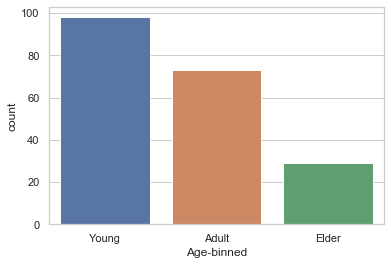

In [39]:
#plotting distribution of each bin
sns.set(style="whitegrid")
sns.countplot(x = df['Age-binned'])

##### Conclusion

The mall is frequented mostly by young people followed by adults and hardly by elders.

In [40]:
#performing binning on income
bins = np.linspace(min(df['Annual Income (k$)']), max(df['Annual Income (k$)']), 4)
bins

array([ 15.        ,  55.66666667,  96.33333333, 137.        ])

In [41]:
#making groups
group_names = ['Low', 'Medium', 'High']

In [42]:
#adding groups to table
df['Income-binned'] = pd.cut(df['Annual Income (k$)'], bins, labels = group_names, include_lowest = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age-binned,Income-binned
0,Male,19,15,39,Young,Low
1,Male,21,15,81,Young,Low
2,Female,20,16,6,Young,Low
3,Female,23,16,77,Young,Low
4,Female,31,17,40,Young,Low


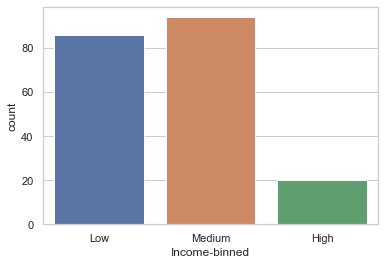

In [43]:
#plotting distribution of each bin
sns.countplot(x = df['Income-binned'])

##### Conclusion:

The mall is frequented mostly by low and medium wealth income people and hardly by high income people.

### Exploratory Data Analysis

In [44]:
#Understanding data distribution
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [45]:
#understanding inter column correlations
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


##### Conclusion:

There seems to be some correlation between age and spending score.

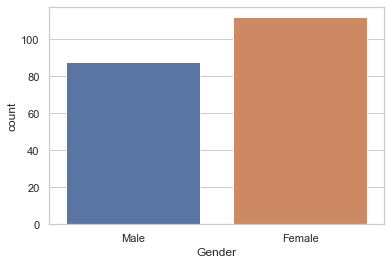

In [46]:
#understanding gender distribution
sns.countplot(x = df['Gender'])

##### Conclusion:
More females frequent the mall than males

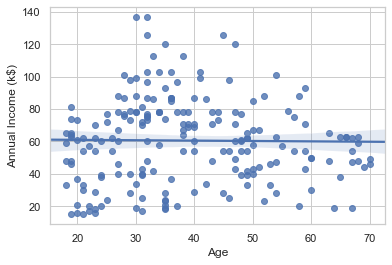

In [54]:
#plotting Age vs Annual income
sns.regplot(x = df['Age'], y = df['Annual Income (k$)'])

##### Conclusion:

No correlation between age and income.

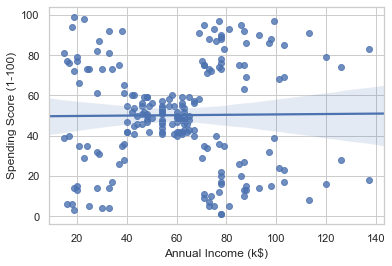

In [48]:
#plotting Annual income vs Spending Score
sns.regplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'])

##### Conclusion:
No correlation between income and spending but middle income group from 40k to 70k tend to be concistant with their spending score.

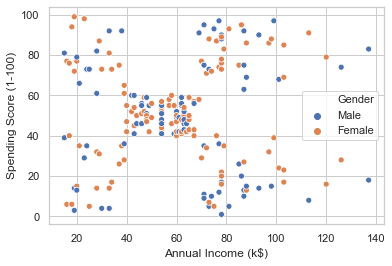

In [49]:
#plotting scatter plot of Annual income vs Spending score
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['Gender'])

##### Conclusion:

No more valid clues obtained.

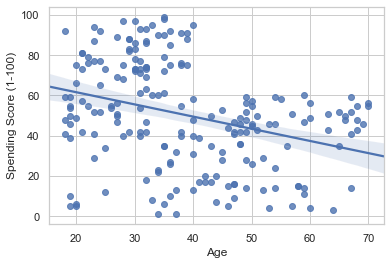

In [50]:
#Plotting Age vs Spending Score
sns.regplot(x = df['Age'], y = df['Spending Score (1-100)'])

##### Conclusion:

There is some correlation between age and spending. Young people tend to spend more.

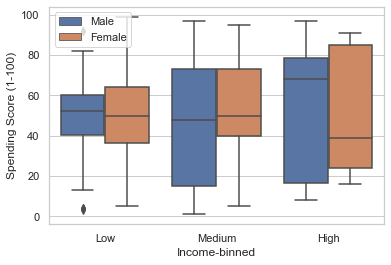

In [51]:
#finding relation between income and spending score
sns.boxplot(x = df['Income-binned'], y = df['Spending Score (1-100)'], hue = df['Gender']).legend(loc='upper left')

##### Conclusion:

High income males tend to spend more in the mall.

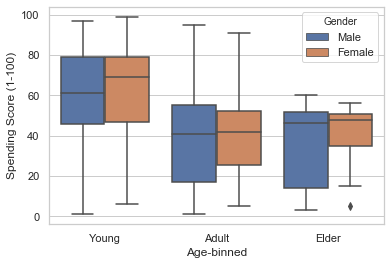

In [55]:
#finding relation between Age and Spending Score
sns.boxplot(x = df['Age-binned'], y = df['Spending Score (1-100)'], hue = df['Gender'])

##### Conclusion:

Young people tend to spend more in the mall. Especially females.

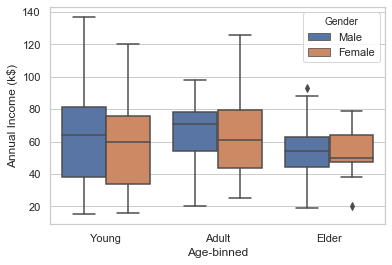

In [53]:
#finding relation age and annual income
sns.boxplot(x = df['Age-binned'], y = df['Annual Income (k$)'], hue = df['Gender'])

##### Conclusion:

There is no relation in income and age brackets. Males tend to have more income than females on an average.